He decidido escoger dos datasets sobre fútbol internacional:
   - El primero es sobre los resultados de todos los partidos jugados.
   - El segundo es sobre todos los goleadores de esos partidos.

Mi idea inicial es preguntarme:

1. **Distribución de goles:**
   - ¿Cuál es la distribución de la cantidad de goles por partido?
   - ¿En que minutos se marcan mas goles? (El madrid en champions a partir de 90 pero en selecciones no lo sabemos)
   
2. **Tendencias temporales:**
   - ¿Cómo ha cambiado la cantidad de goles a lo largo de los años?
   - ¿Existen períodos específicos con más o menos goles?

3. **Equipos destacados:**
   - ¿Cuáles son las seleciones que han marcado más goles en promedio por partido?
   - ¿Cuáles han recibido más goles?
   - ¿Quienes son los goleadores de cada época y sus rivales favoritos?

4. **Análisis de local y visitante:**
   - ¿Existen diferencias significativas en la cantidad de goles marcados en casa y fuera?, principales equipos en cada una de ellas
   

5. **Partidos destacados:**
   - ¿Cuáles son los partidos con la mayor cantidad de goles y donde se concentran temporalmente?
   

6. **Desempeño en torneos:**
   - ¿Cómo varía la cantidad de goles en los diferentes torneos?
   

7. **Análisis geográfico:** (para esto necesitaria otro data set con los paises, podria sacarlo mediante api para completar el EDA)
    - ¿Hay diferencias en la cantidad de goles marcados en diferentes regiones geográficas?
    - ¿Que continente ha ganado mas partidos? 




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [3]:
ds = pd.read_csv("./data/results.csv")
df = pd.read_csv("./data/goalscorers.csv")

In [4]:
Total_match_score = ds.home_score + ds.away_score
ds["match_score"] = Total_match_score


In [5]:
qualification_tournaments = ds[ds['tournament'].str.contains('qualification', case=False)]
print(qualification_tournaments['tournament'])


1588     FIFA World Cup qualification
1593     FIFA World Cup qualification
1612     FIFA World Cup qualification
1620     FIFA World Cup qualification
1627     FIFA World Cup qualification
                     ...             
45310         UEFA Euro qualification
45311         UEFA Euro qualification
45312         UEFA Euro qualification
45313         UEFA Euro qualification
45314         UEFA Euro qualification
Name: tournament, Length: 14768, dtype: object


In [6]:
df

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
43184,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False
43185,2023-11-21,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False
43186,2023-11-21,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False
43187,2023-11-21,Wales,Turkey,Wales,Neco Williams,7.0,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43189 entries, 0 to 43188
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       43189 non-null  object 
 1   home_team  43189 non-null  object 
 2   away_team  43189 non-null  object 
 3   team       43189 non-null  object 
 4   scorer     43139 non-null  object 
 5   minute     42929 non-null  float64
 6   own_goal   43187 non-null  object 
 7   penalty    43187 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.6+ MB


In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45315 entries, 0 to 45314
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         45315 non-null  object
 1   home_team    45315 non-null  object
 2   away_team    45315 non-null  object
 3   home_score   45315 non-null  int64 
 4   away_score   45315 non-null  int64 
 5   tournament   45315 non-null  object
 6   city         45315 non-null  object
 7   country      45315 non-null  object
 8   neutral      45315 non-null  bool  
 9   match_score  45315 non-null  int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 3.2+ MB


# Análisis de los Máximos Goleadores en Décadas y Global

En las primeras búsquedas de jugadores, mi enfoque se centró en descubrir datos curiosos y sorpresas en la información recopilada. Particularmente, me dirigí a los máximos goleadores tanto en décadas como en el cómputo global, así como a los minutos en los que se marcaron esos goles.

## Máximos Goleadores en Décadas

Exploré los datos para identificar a los jugadores que dominaron cada década en términos de goles. Este enfoque permite entender la evolución de las estrellas a lo largo del tiempo y destacar posibles patrones o cambios en la dinámica del juego.

## Máximos Goleadores Globales

La búsqueda también se extendió a los máximos goleadores en el cómputo global. Este análisis proporciona una visión general de los jugadores que han dejado una marca duradera en la historia del deporte, destacando la consistencia a lo largo de sus carreras.

## Minutos en los que se Marcan los Goles

Además de evaluar quiénes son los goleadores más destacados, examiné los minutos específicos en los que se marcaron los goles. Esta perspectiva temporal puede revelar patrones de desempeño, como la tendencia de algunos jugadores a destacar en momentos cruciales o a lo largo de ciertos períodos del partido.

Este análisis no solo se centra en las estadísticas brutas, sino en la búsqueda de narrativas interesantes detrás de los datos. 


In [9]:
'''Intento ver algun dato curioso en los goleadores de cada época dividiendo
el df por decadas y sacando el top 5'''

df['date'] = pd.to_datetime(df['date'])

# Obtener la década a partir del año
df['decade'] = df['date'].dt.year // 10 * 10

# Encontrar al máximo goleador por década
top5_scorers_per_decade = df.groupby(['decade', 'scorer']).size().reset_index(name='goals')
top5_scorers_per_decade = top5_scorers_per_decade.sort_values(['decade', 'goals'], ascending=[True, False])
top5_scorers_per_decade = top5_scorers_per_decade.groupby('decade').head(5)

print(top5_scorers_per_decade)

       decade                   scorer  goals
9        1910           Carlos Scarone      6
25       1910                     Neco      6
6        1910      Arthur Friedenreich      5
16       1910         Isabelino Gradín      5
2        1910            Alberto Ohaco      4
82       1920           Héctor Scarone     10
119      1920            Pedro Petrone     10
65       1920           David Arellano      8
81       1920            Héctor Castro      8
109      1920            Manuel Seoane      8
245      1930         Gyula Zsengellér     10
392      1930          Severino Varela     10
402      1930        Teodoro Fernández     10
354      1930          Oldřich Nejedlý      9
427      1930          Ēriks Pētersons      9
604      1940  Norberto Doroteo Méndez     17
669      1940                  Zizinho     14
525      1940                     Jair     13
543      1940       José Manuel Moreno     13
430      1940        Ademir de Menezes     12
987      1950            Just Font

In [10]:
''' top 10 goleadores de todas las epocas, posteriormente me doy cuenta de que aquí
aparecen torneos menores y no lo incluyo porque lo considero injusto'''
# Obtener el top 10 histórico de goleadores con información del país
top10_scorers = df.groupby(['scorer', 'team']).size().reset_index(name='goals')
top10_scorers = top10_scorers.sort_values('goals', ascending=False).head(10)

# Mostrar los resultados
print(top10_scorers)

                    scorer                    team  goals
2605     Cristiano Ronaldo                Portugal    111
11357   Robert Lewandowski                  Poland     62
11551        Romelu Lukaku                 Belgium     61
5096            Harry Kane                 England     55
7924          Lionel Messi               Argentina     54
3407            Edin Džeko  Bosnia and Herzegovina     50
751               Ali Daei                    Iran     49
9231        Miroslav Klose                 Germany     48
2159           Carlos Ruiz               Guatemala     47
555    Aleksandar Mitrović                  Serbia     47


In [11]:
'''Trato de ver si algun jugador tiene alguna tendencia a marcar en un minuto concreto
pero no lo veo claramente en los datos. Dejo como ejemplo a CR pero he probado con todos 
usando el mismo código'''


jugador = 'Cristiano Ronaldo'
goles_minuto = df[df['scorer'] == jugador][['date', 'team', 'minute']]
print(f"Goles de {jugador}:\n{goles_minuto}")

Goles de Cristiano Ronaldo:
            date      team  minute
23130 2004-06-12  Portugal    90.0
23320 2004-06-30  Portugal    26.0
23602 2004-09-04  Portugal    57.0
23777 2004-09-08  Portugal    75.0
24054 2004-10-13  Portugal    39.0
...          ...       ...     ...
42951 2023-10-13  Portugal    29.0
42953 2023-10-13  Portugal    72.0
43006 2023-10-16  Portugal     5.0
43007 2023-10-16  Portugal    20.0
43064 2023-11-16  Portugal    46.0

[111 rows x 3 columns]


In [12]:
jugador_seleccionado = 'Cristiano Ronaldo'
goles_del_jugador = (df['scorer'] == jugador_seleccionado).sum()

print(f"Goles de {jugador_seleccionado}: {goles_del_jugador}")

Goles de Cristiano Ronaldo: 111


2. **Tendencias temporales:**
   - ¿Cómo ha cambiado la cantidad de goles a lo largo de los años?
   - ¿Existen períodos específicos con más o menos goles?

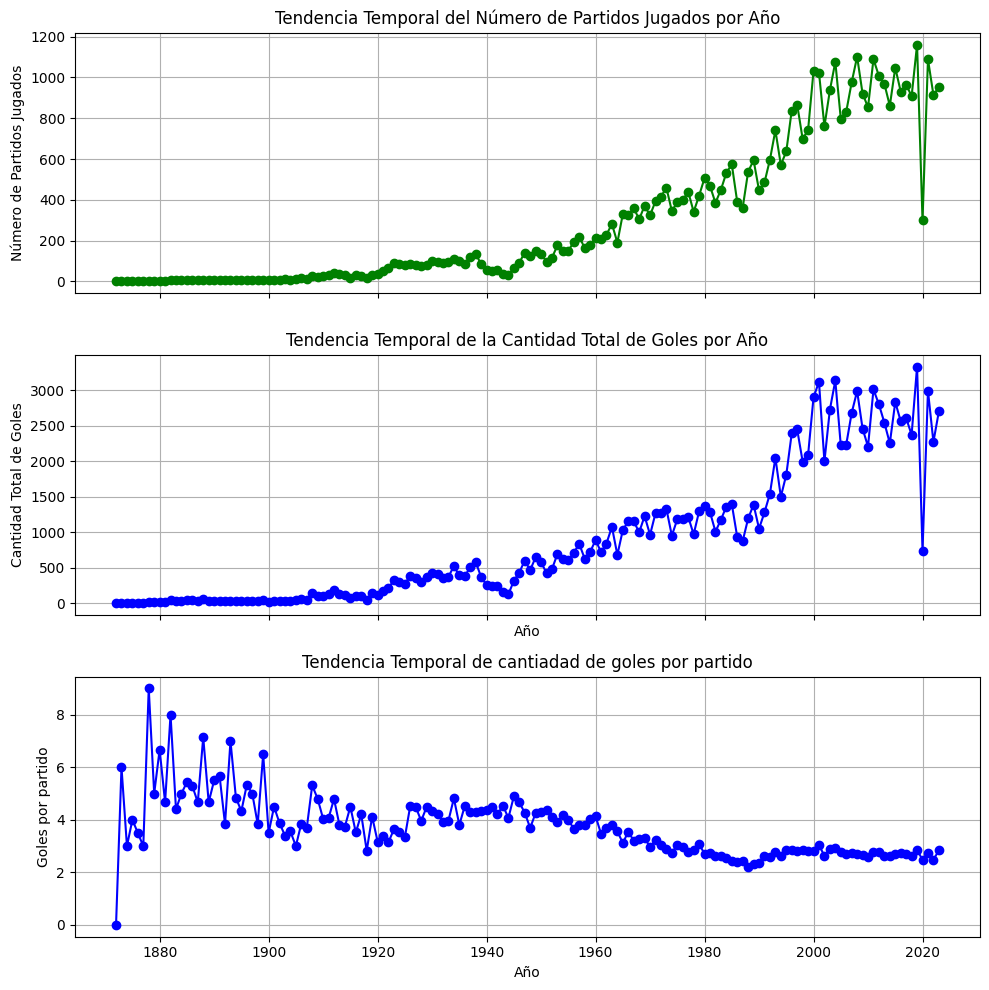

In [13]:
'''Pregunta 2: 2. **Tendencias temporales:**
   - ¿Cómo ha cambiado la cantidad de goles a lo largo de los años?
   - ¿Existen períodos específicos con más o menos goles? '''



# Convertir la columna 'date' a tipo datetime
ds['date'] = pd.to_datetime(ds['date'])

# Obtener el número de partidos jugados por año
matches_per_year = ds.groupby(ds['date'].dt.year).size().reset_index(name='matches_played')

# Agrupar por año y sumar la cantidad total de goles
goals_per_year = ds.groupby(ds['date'].dt.year)['home_score'].sum().reset_index()
goals_away = ds.groupby(ds['date'].dt.year)['away_score'].sum().reset_index()
goals_per_year['total_goals'] = goals_per_year['home_score'] + goals_away['away_score']

# Crear una figura con dos subgráficos (uno encima del otro)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

# Gráfico de tendencia temporal del número de partidos jugados
ax1.plot(matches_per_year['date'], matches_per_year['matches_played'], marker='o', color='green')
ax1.set_title('Tendencia Temporal del Número de Partidos Jugados por Año')
ax1.set_ylabel('Número de Partidos Jugados')
ax1.grid(True)

# Gráfico de tendencia temporal de la cantidad total de goles
ax2.plot(goals_per_year['date'], goals_per_year['total_goals'], marker='o', color='blue')
ax2.set_title('Tendencia Temporal de la Cantidad Total de Goles por Año')
ax2.set_xlabel('Año')
ax2.set_ylabel('Cantidad Total de Goles')
ax2.grid(True)


goles_partido = goals_per_year['total_goals']/matches_per_year['matches_played']
ax3.plot(goals_per_year['date'], goles_partido , marker='o', color='blue')
ax3.set_title('Tendencia Temporal de cantiadad de goles por partido')
ax3.set_xlabel('Año')
ax3.set_ylabel('Goles por partido')
ax3.grid(True)
# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


# Análisis de Tendencias Temporales en Partidos y Goles por Año

## Introducción
En el presente análisis, se exploraron las tendencias temporales en la cantidad de partidos jugados y la cantidad total de goles en partidos de fútbol. Los datos abarcan desde el año 1872 hasta la fecha más reciente disponible.

## Tendencia Temporal en Partidos Jugados
Al observar el número de partidos jugados por año, se identifica una tendencia general alcista a lo largo del tiempo. Esta tendencia muestra un aumento constante en la cantidad de partidos, indicando un crecimiento sostenido en la actividad futbolística a nivel mundial. Sin embargo, se destacó una excepción en el año 2020, donde la cantidad de partidos jugados disminuyó significativamente. Este descenso puede atribuirse a las restricciones y paralizaciones de eventos deportivos debido a la pandemia global de COVID-19.

## Tendencia Temporal en Goles por Año
La cantidad total de goles en partidos de fútbol también sigue una tendencia general alcista a lo largo de los años. Esta tendencia positiva indica un aumento en la cantidad de goles marcados en los partidos. Es importante señalar que la tendencia se ve afectada por el año 2020, donde se registró una disminución en la actividad futbolística.

## Análisis de Goles por Partido
Para comprender mejor la eficiencia en la producción de goles en relación con la cantidad de partidos jugados, se calculó la cantidad de goles por partido para cada año. Aunque la tendencia general indica una disminución en los goles por partido, esta disminución parece estabilizarse desde alrededor de 1990. Este hallazgo sugiere que, a pesar del aumento en la cantidad de partidos, la eficiencia en la producción de goles se ha mantenido relativamente constante en las últimas décadas.

## Conclusiones
1. **Tendencia Alcista General:** La cantidad de partidos jugados y la cantidad total de goles han mostrado una tendencia alcista a lo largo del tiempo, lo que sugiere un crecimiento continuo en la popularidad y la participación en eventos futbolísticos.

2. **Impacto del Año 2020:** La disminución en el número de partidos y goles en el año 2020 refleja el impacto significativo de la pandemia de COVID-19 en el mundo del deporte.

3. **Estabilidad en Goles por Partido:** A pesar de la tendencia a la baja en los goles por partido, este indicador se ha mantenido relativamente constante desde alrededor de 1990, indicando una consistencia en la eficiencia de producción de goles a lo largo de las décadas recientes.

En resumen, el análisis revela patrones interesantes en las tendencias temporales del fútbol, destacando tanto el crecimiento general en la actividad como la estabilidad en la eficiencia de producción de goles.



3. **Equipos destacados:**
   - ¿Cuáles son las seleciones que han marcado más goles en promedio por partido?
   - ¿Cuáles han recibido más goles?


C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\106951497.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\106951497.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\106951497.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\106951497.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=

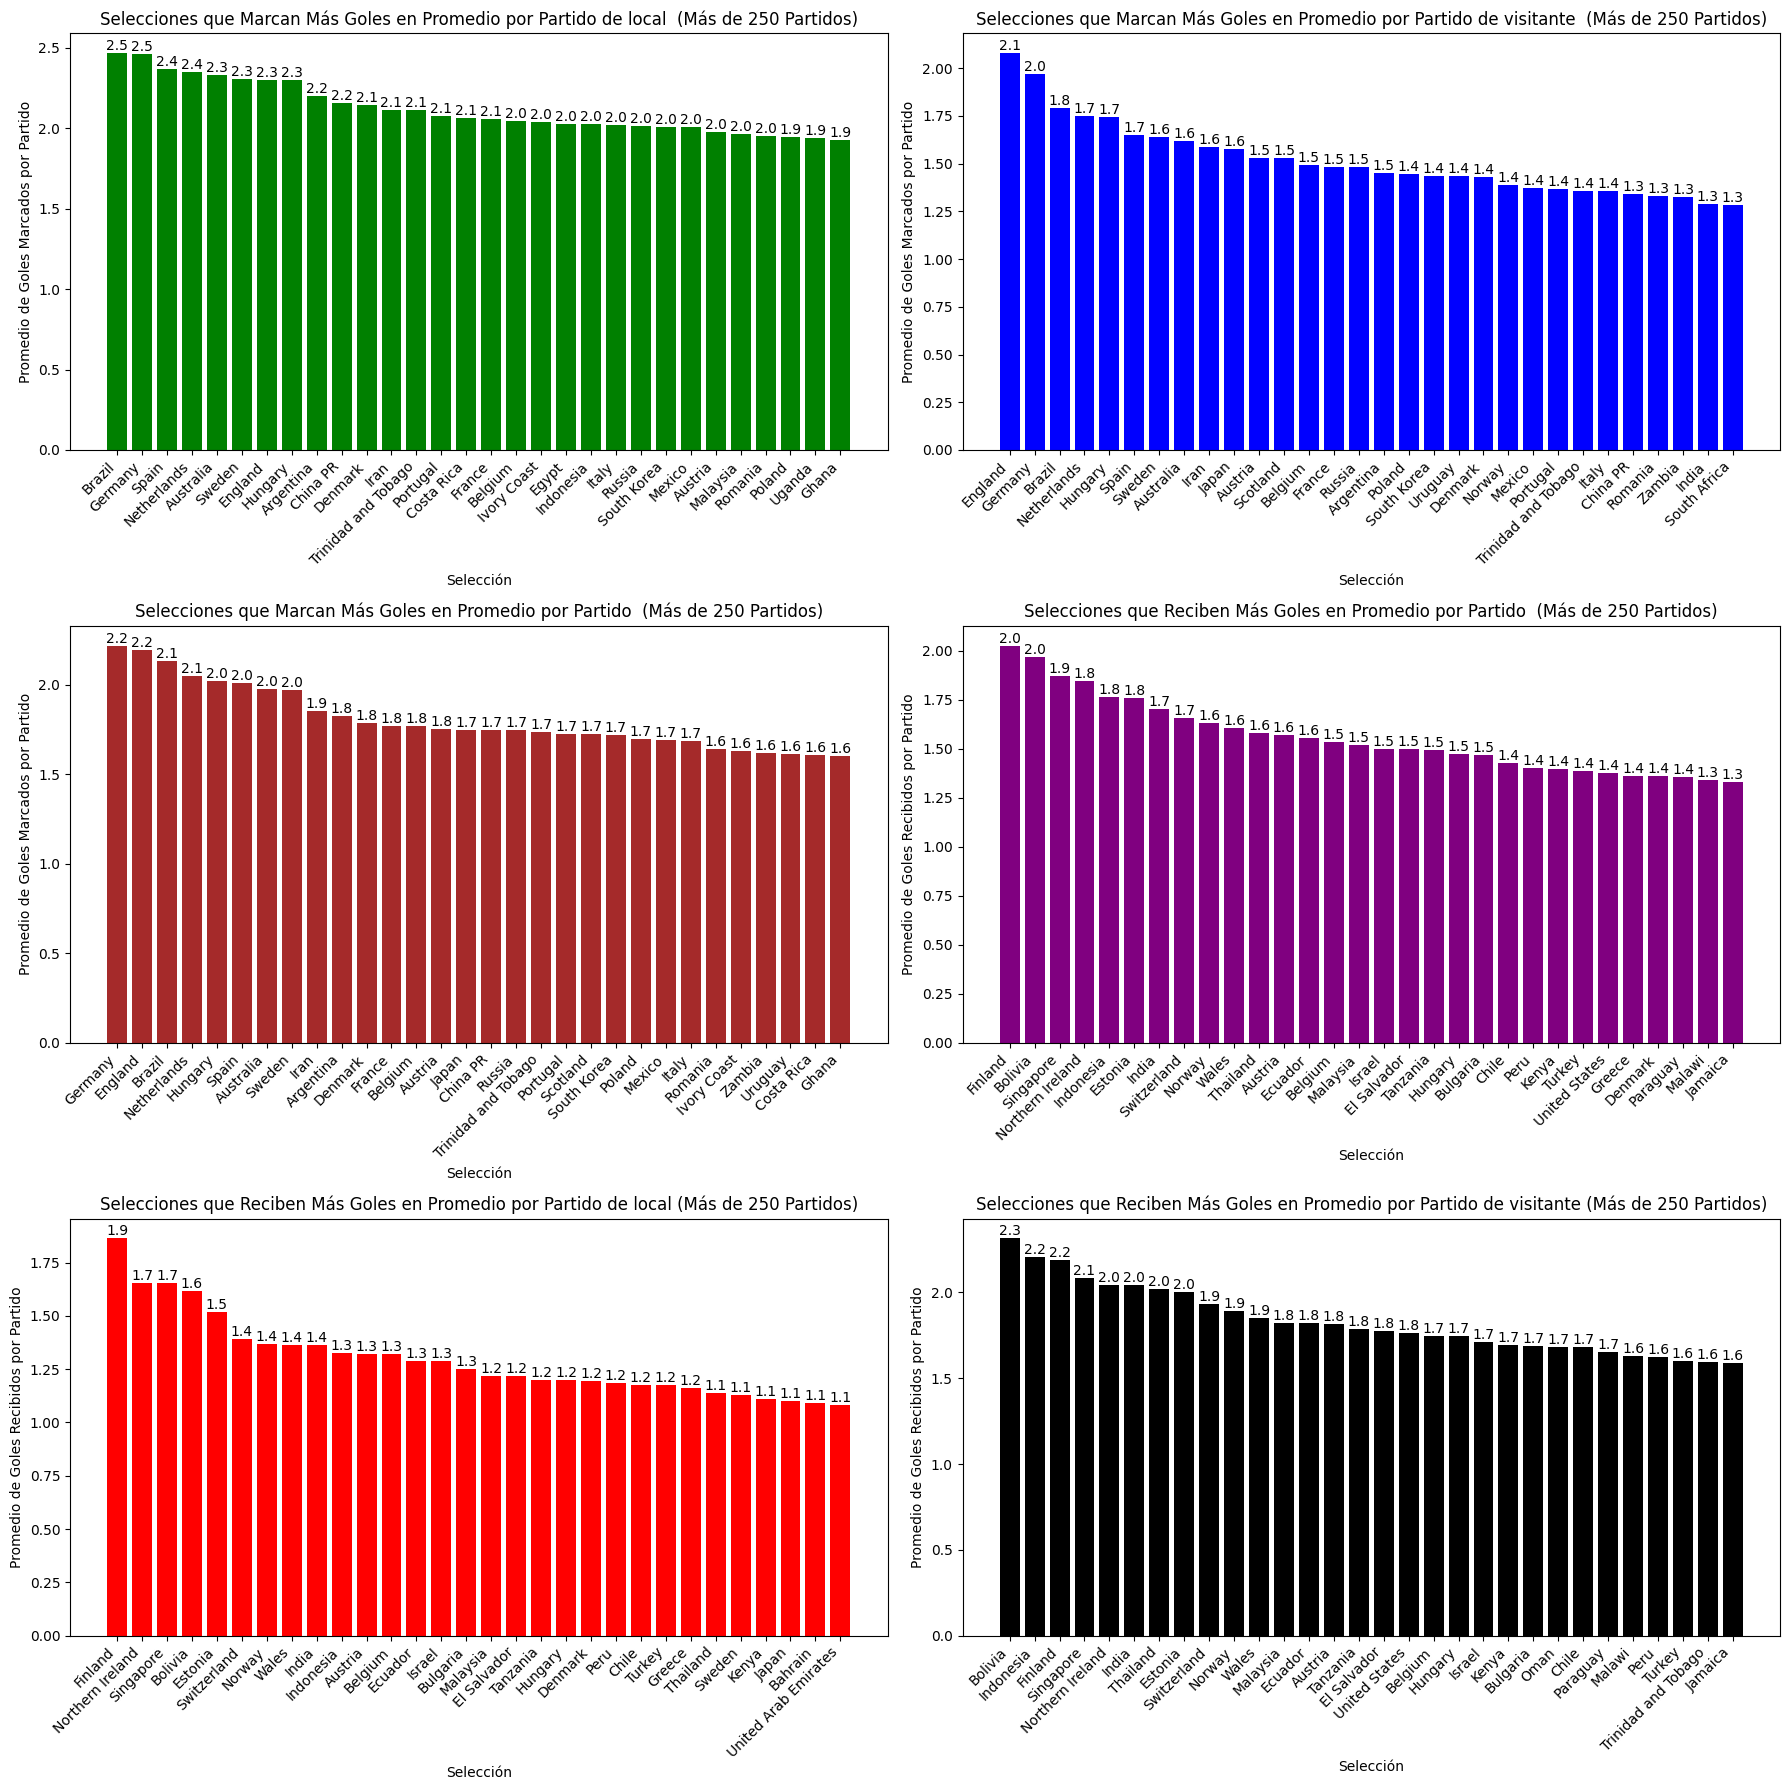

In [14]:

# Función para crear gráficos de barras
def create_bar_chart(ax, data, title, x_label, y_label, color):
    bars = ax.bar(data['team'], data['average_goals'], color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(data['team'], rotation=45, ha='right')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Filtrar equipos con más de 250 partidos
teams_with_over_250_matches_local = ds['home_team'].value_counts()[ds['home_team'].value_counts() > 250].index
filtered_ds_local = ds[ds['home_team'].isin(teams_with_over_250_matches_local)]
teams_with_over_250_matches_visitante = ds['away_team'].value_counts()[ds['away_team'].value_counts() > 250].index
filtered_ds_visitante = ds[ds['away_team'].isin(teams_with_over_250_matches_local)]

# Calcular el promedio de goles marcados por partido para cada selección de local
average_goals_scored_home = filtered_ds_local.groupby('home_team')['home_score'].mean().reset_index()
average_goals_scored_home.columns = ['team', 'average_goals']
average_goals_scored_away = filtered_ds_visitante.groupby('away_team')['away_score'].mean().reset_index()
average_goals_scored_away.columns = ['team', 'average_goals']
total_goals_scored = (average_goals_scored_home["average_goals"] + average_goals_scored_away["average_goals"])/2
average_total_goles_marcados = pd.DataFrame({'team': average_goals_scored_away['team'], 'average_goals': total_goals_scored})

# Calcular el promedio de goles recibidos por partido para cada selección de local
average_goals_received_local = filtered_ds_local.groupby('home_team')['away_score'].mean().reset_index()
average_goals_received_local.columns = ['team', 'average_goals']
average_goals_received_visitante = filtered_ds_visitante.groupby('away_team')['home_score'].mean().reset_index()
average_goals_received_visitante.columns = ['team', 'average_goals']
average_total_goles_recibidos = pd.DataFrame({'team': average_goals_received_visitante['team'], 
                                              'average_goals': (average_goals_received_visitante['average_goals'] + average_goals_received_local['average_goals'])/2})

# Crear subplots usando ax
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Gráficos de barras para goles marcados de local y visitante
create_bar_chart(axes[0, 0], average_goals_scored_home.sort_values(by= "average_goals",ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido de local  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'green')
create_bar_chart(axes[0, 1], average_goals_scored_away.sort_values(by= "average_goals",ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido de visitante  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'blue')

# Gráfico de barras para goles marcados totales
create_bar_chart(axes[1, 0], average_total_goles_marcados.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'brown')

# Gráficos de barras para goles recibidos de local y visitante
create_bar_chart(axes[2, 0], average_goals_received_local.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Reciben Más Goles en Promedio por Partido de local (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'red')
create_bar_chart(axes[2, 1], average_goals_received_visitante.sort_values(by='average_goals', ascending=False).head(30),
                  'Selecciones que Reciben Más Goles en Promedio por Partido de visitante (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'black')

# Gráfico de barras para goles recibidos totales
create_bar_chart(axes[1, 1], average_total_goles_recibidos.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Reciben Más Goles en Promedio por Partido  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'purple')

plt.tight_layout()
plt.show()


# Refinamiento del Análisis: Filtrado de Competiciones Destacadas

En una fase más precisa del análisis, se opta por limpiar el conjunto de datos centrándonos exclusivamente en las competiciones de mayor relevancia. Este proceso implica excluir partidos amistosos y competiciones de menor trascendencia, concentrándonos en eventos de alta importancia como Mundiales, Copa América, Eurocopa, entre otros.

## Justificación del Filtrado

La decisión de llevar a cabo este filtrado se fundamenta en el propósito de obtener una visión más precisa y significativa del rendimiento goleador de los equipos. Al restringir el análisis a competiciones de alto perfil, como los principales torneos continentales y la Copa del Mundo, se busca eliminar el ruido estadístico provocado por encuentros amistosos y competiciones de menor calibre.

## Competiciones Consideradas

Las competiciones seleccionadas para este análisis más enfocado incluyen, entre otras:

- Copa del Mundo (FIFA World Cup)
- Eurocopa (UEFA Euro)
- Copa América
- Gold Cup
- African Cup of Nations
- Asian Cup (AFC Asian Cup)
- Oceania Nations Cup
- Copa de Confederaciones (Confederations Cup)

Este enfoque refinado proporcionará una perspectiva más clara y significativa sobre los equipos más destacados en términos goleadores en contextos de alta competición, permitiendo una interpretación más precisa de los resultados.


In [15]:
# Asegúrate de tener la columna 'date' en formato datetime
ds['date'] = pd.to_datetime(ds['date'])

# Filtrar equipos con más de 250 partidos
teams_with_over_250_matches_local = ds['home_team'].value_counts()[ds['home_team'].value_counts() > 250].index
filtered_ds_local = ds[ds['home_team'].isin(teams_with_over_250_matches_local)]
teams_with_over_250_matches_visitante = ds['away_team'].value_counts()[ds['away_team'].value_counts() > 250].index
filtered_ds_visitante = ds[ds['away_team'].isin(teams_with_over_250_matches_local)]

# Agregar una columna 'decade' para agrupar por década
filtered_ds_local['decade'] = (filtered_ds_local['date'].dt.year // 10) * 10
filtered_ds_visitante['decade'] = (filtered_ds_visitante['date'].dt.year // 10) * 10

# Calcular el total de goles marcados por cada selección de local por década
total_goals_local = filtered_ds_local.groupby(['home_team', 'decade'])['home_score'].sum().reset_index()
total_goals_local.columns = ['team', 'decade', 'total_goals_local']

# Calcular el total de goles marcados por cada selección de visitante por década
total_goals_visitante = filtered_ds_visitante.groupby(['away_team', 'decade'])['away_score'].sum().reset_index()
total_goals_visitante.columns = ['team', 'decade', 'total_goals_visitante']

# Fusionar ambos conjuntos de datos para obtener el total de goles por selección por década
total_goals = pd.merge(total_goals_local, total_goals_visitante, on=['team', 'decade'], how='outer')

# Rellenar NaN con 0, en caso de que una selección haya jugado solo de local o visitante
total_goals = total_goals.fillna(0)

# Calcular la suma total de goles por década
total_goals['total_goals'] = total_goals['total_goals_local'] + total_goals['total_goals_visitante']

# Mostrar el DataFrame resultante
total_goals


C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\2250291084.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ds_local['decade'] = (filtered_ds_local['date'].dt.year // 10) * 10
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\2250291084.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ds_visitante['decade'] = (filtered_ds_visitante['date'].dt.year // 10) * 10


,team,decade,total_goals_local,total_goals_visitante,total_goals
0,Algeria,1960,26.0,6.0,32.0
1,Algeria,1970,72.0,22.0,94.0
2,Algeria,1980,129.0,38.0,167.0
3,Algeria,1990,78.0,38.0,116.0
4,Algeria,2000,104.0,31.0,135.0
...,...,...,...,...,...
789,South Africa,1920,0.0,3.0,3.0
790,South Africa,1940,0.0,36.0,36.0
791,South Korea,1940,0.0,10.0,10.0
792,Thailand,1950,0.0,8.0,8.0


# Creación de DataFrame para Competiciones Destacadas

En el proceso de análisis de datos, se ha generado un nuevo DataFrame focalizado en competiciones que se consideran destacadas a nivel mundial y continental. Este DataFrame, denominado `competiciones_destacadas`, incluye las siguientes competiciones:

- **FIFA World Cup**: La prestigiosa Copa del Mundo organizada por la FIFA.
- **FIFA World Cup qualification**: Las eliminatorias para la Copa del Mundo FIFA.
- **UEFA Euro**: El campeonato de selecciones nacionales de la UEFA.
- **UEFA Euro qualification**: Las eliminatorias para la UEFA Euro.
- **Copa América**: El torneo de selecciones sudamericanas.
- **Copa América qualification**: Las eliminatorias para la Copa América.
- **Gold Cup**: El torneo de selecciones de América del Norte, América Central y el Caribe.
- **Gold Cup qualification**: Las eliminatorias para la Gold Cup.
- **African Cup of Nations**: El campeonato de selecciones nacionales africanas.
- **African Cup of Nations qualification**: Las eliminatorias para la Copa Africana de Naciones.
- **African Nations Championship**: Torneo de selecciones nacionales africanas con jugadores que juegan en sus propias ligas.
- **African Nations Championship qualification**: Las eliminatorias para el African Nations Championship.
- **AFC Asian Cup**: El torneo de selecciones nacionales de la Confederación Asiática de Fútbol.
- **AFC Asian Cup qualification**: Las eliminatorias para la AFC Asian Cup.
- **Oceania Nations Cup**: El campeonato de selecciones de la OFC (Confederación de Fútbol de Oceanía).
- **Oceania Nations Cup qualification**: Las eliminatorias para la Oceania Nations Cup.
- **Confederations Cup**: Torneo internacional de selecciones, generalmente considerado como preparación para la Copa del Mundo.
- **COSAFA Cup**: Torneo de selecciones del Consejo de Asociaciones de Fútbol del Sur de África.
- **COSAFA Cup qualification**: Las eliminatorias para la COSAFA Cup.
- **CFU Caribbean Cup**: Torneo de selecciones del Caribe.
- **CFU Caribbean Cup qualification**: Las eliminatorias para la CFU Caribbean Cup.
- **Gulf Cup**: Torneo de selecciones del Golfo Pérsico.

Este DataFrame proporciona una base sólida para analizar y comparar datos específicos de estas competiciones destacadas a lo largo del tiempo.


In [16]:
#Competiciones destacadas 
'''Limpio el df quedandome solo con las competiciones internacionales más destadadas por continente y a nivel mundial
'''

competiciones_destacadas = [
    'FIFA World Cup', 'FIFA World Cup qualification', 'UEFA Euro', 'UEFA Euro qualification', 'Copa América',
      'Copa América qualification', 'Gold Cup', 'Gold Cup qualification', 'African Cup of Nations', 'African Cup of Nations qualification', 
      'African Nations Championship', 'African Nations Championship qualification', 'AFC Asian Cup', 'AFC Asian Cup qualification', 'Oceania Nations Cup',
        'Oceania Nations Cup qualification', 'Confederations Cup', 'COSAFA Cup', 'COSAFA Cup qualification', 'CFU Caribbean Cup', 'CFU Caribbean Cup qualification', 'Gulf Cup'
]




In [17]:
#Creo un nuevo df solo con las competiciones descadas
df_ci = ds[ds['tournament'].isin(competiciones_destacadas)]
df_ci["tournament"].unique()

array(['Copa América', 'FIFA World Cup', 'FIFA World Cup qualification',
       'AFC Asian Cup qualification', 'AFC Asian Cup',
       'African Cup of Nations', 'UEFA Euro qualification', 'UEFA Euro',
       'African Cup of Nations qualification', 'Gulf Cup',
       'Oceania Nations Cup', 'CFU Caribbean Cup qualification',
       'CFU Caribbean Cup', 'Gold Cup', 'Confederations Cup',
       'Oceania Nations Cup qualification', 'COSAFA Cup qualification',
       'COSAFA Cup', 'Gold Cup qualification',
       'African Nations Championship', 'Copa América qualification',
       'African Nations Championship qualification'], dtype=object)

In [18]:
#Creo otro df para sumar los goles de todas de todas las selecciones para ver las mas goleadoras tanto de local como de visitante
goals_df = pd.DataFrame()

# Obtener la lista de equipos únicos
teams = pd.concat([df_ci['home_team'], df_ci['away_team']]).unique()

# Iterar sobre cada equipo y calcular los goles
for team in teams:
    home_goals = df_ci[df_ci['home_team'] == team]['home_score'].sum()
    away_goals = df_ci[df_ci['away_team'] == team]['away_score'].sum()
    
    # Agregar una fila al DataFrame
    goals_df = pd.concat([goals_df, pd.DataFrame({'team': [team], 'home_goals': [home_goals], 'away_goals': [away_goals]})])

# Resetear los índices del nuevo DataFrame
goals_df = goals_df.reset_index(drop=True)

# Mostrar el DataFrame resultante
print(goals_df)

                          team  home_goals  away_goals
0                        Chile         380         197
1                    Argentina         705         213
2                       Brazil         775         279
3                      Uruguay         346         428
4                     Paraguay         255         258
..                         ...         ...         ...
221  Saint Pierre and Miquelon           1           1
222                South Sudan          20          11
223                    Bonaire           1           5
224                  Gibraltar           6           6
225                     Kosovo          13          19

[226 rows x 3 columns]


C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\89183702.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\89183702.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\89183702.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, ha='right')
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\89183702.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data['team'], rotation=45, 

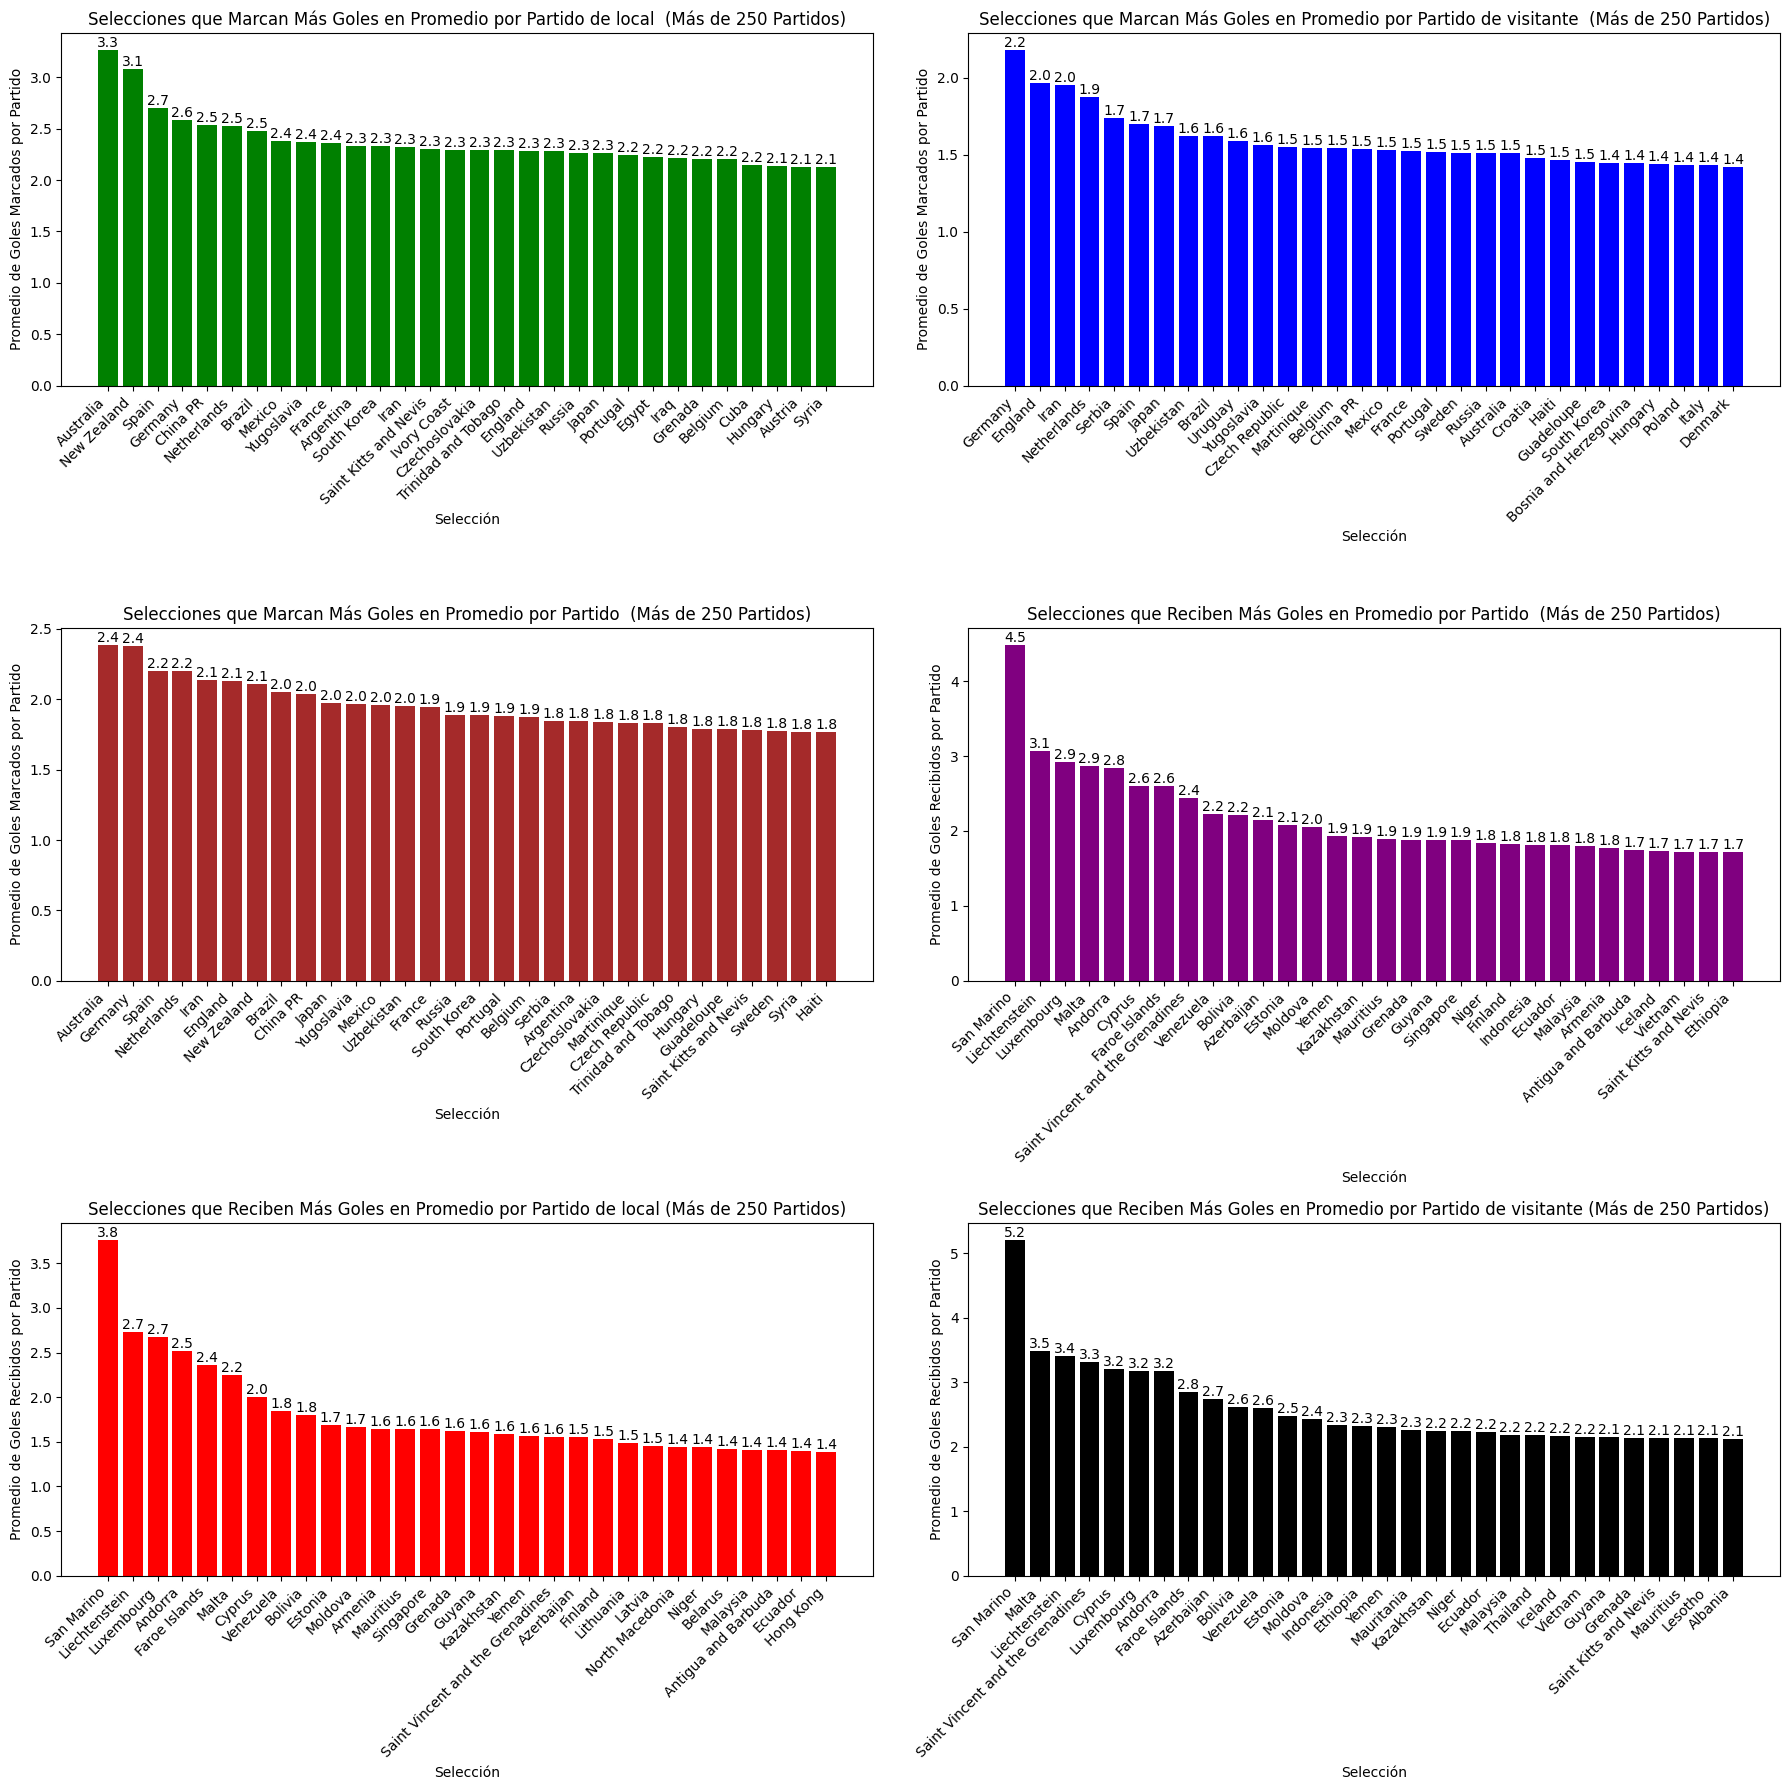

In [19]:
# Función para crear gráficos de barras
def create_bar_chart(ax, data, title, x_label, y_label, color):
    bars = ax.bar(data['team'], data['average_goals'], color=color)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticklabels(data['team'], rotation=45, ha='right')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

# Filtrar equipos con más de 250 partidos
teams_with_over_250_matches_local = df_ci['home_team'].value_counts()[df_ci['home_team'].value_counts() > 50].index
filtered_df_ci_local = df_ci[df_ci['home_team'].isin(teams_with_over_250_matches_local)]
teams_with_over_250_matches_visitante = df_ci['away_team'].value_counts()[df_ci['away_team'].value_counts() > 50].index
filtered_df_ci_visitante = df_ci[df_ci['away_team'].isin(teams_with_over_250_matches_local)]

# Calcular el promedio de goles marcados por partido para cada selección de local
average_goals_scored_home = filtered_df_ci_local.groupby('home_team')['home_score'].mean().reset_index()
average_goals_scored_home.columns = ['team', 'average_goals']
average_goals_scored_away = filtered_df_ci_visitante.groupby('away_team')['away_score'].mean().reset_index()
average_goals_scored_away.columns = ['team', 'average_goals']
total_goals_scored = (average_goals_scored_home["average_goals"] + average_goals_scored_away["average_goals"])/2
average_total_goles_marcados = pd.DataFrame({'team': average_goals_scored_away['team'], 'average_goals': total_goals_scored})

# Calcular el promedio de goles recibidos por partido para cada selección de local
average_goals_received_local = filtered_df_ci_local.groupby('home_team')['away_score'].mean().reset_index()
average_goals_received_local.columns = ['team', 'average_goals']
average_goals_received_visitante = filtered_df_ci_visitante.groupby('away_team')['home_score'].mean().reset_index()
average_goals_received_visitante.columns = ['team', 'average_goals']
average_total_goles_recibidos = pd.DataFrame({'team': average_goals_received_visitante['team'], 
                                              'average_goals': (average_goals_received_visitante['average_goals'] + average_goals_received_local['average_goals'])/2})

# Crear subplots usando ax
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# Gráficos de barras para goles marcados de local y visitante
create_bar_chart(axes[0, 0], average_goals_scored_home.sort_values(by= "average_goals",ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido de local  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'green')
create_bar_chart(axes[0, 1], average_goals_scored_away.sort_values(by= "average_goals",ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido de visitante  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'blue')

# Gráfico de barras para goles marcados totales
create_bar_chart(axes[1, 0], average_total_goles_marcados.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Marcan Más Goles en Promedio por Partido  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Marcados por Partido', 'brown')

# Gráficos de barras para goles recibidos de local y visitante
create_bar_chart(axes[2, 0], average_goals_received_local.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Reciben Más Goles en Promedio por Partido de local (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'red')
create_bar_chart(axes[2, 1], average_goals_received_visitante.sort_values(by='average_goals', ascending=False).head(30),
                  'Selecciones que Reciben Más Goles en Promedio por Partido de visitante (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'black')

# Gráfico de barras para goles recibidos totales
create_bar_chart(axes[1, 1], average_total_goles_recibidos.sort_values(by='average_goals', ascending=False).head(30), 
                 'Selecciones que Reciben Más Goles en Promedio por Partido  (Más de 250 Partidos)', 'Selección', 'Promedio de Goles Recibidos por Partido', 'purple')

plt.tight_layout()
plt.show()


Creo dos campos, diferencia de goles y goles totales para determinar los partidos más destacados

In [20]:
df_ci["Total_goles"] = df_ci["home_score"] + df_ci["away_score"]
df_ci["Diferencia"] = df_ci["home_score"] - df_ci["away_score"]
df_ci

C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\2451223182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ci["Total_goles"] = df_ci["home_score"] + df_ci["away_score"]
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\2451223182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ci["Diferencia"] = df_ci["home_score"] - df_ci["away_score"]


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_score,Total_goles,Diferencia
438,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,4,4,-4
440,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,7,7,5
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,2,2,0
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,2,2,0
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,3,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,2,2,0
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,1,1,1
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,2,2,-2
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,1,1,-1


In [21]:
top10_partidos = df_ci.nlargest(10, 'Total_goles')
top10_partidos
'''Los partidos con mas goles de la historia'''

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_score,Total_goles,Diferencia
24160,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,31,31,31
24157,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,22,22,22
22926,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False,20,20,20
22839,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True,19,19,19
23820,2000-11-24,Iran,Guam,19,0,FIFA World Cup qualification,Tabriz,Iran,False,19,19,19
20864,1997-06-02,Maldives,Iran,0,17,FIFA World Cup qualification,Damascus,Syria,True,17,17,-17
23394,2000-06-19,Australia,Cook Islands,17,0,Oceania Nations Cup,Papeete,French Polynesia,True,17,17,17
32936,2010-10-14,Dominican Republic,British Virgin Islands,17,0,CFU Caribbean Cup qualification,San Cristóbal,Dominican Republic,False,17,17,17
34899,2012-09-28,Saint Pierre and Miquelon,New Caledonia,1,16,African Nations Championship,Clairefontaine-en-Yvelines,France,True,17,17,-15
21923,1998-09-28,Australia,Cook Islands,16,0,Oceania Nations Cup,Brisbane,Australia,False,16,16,16


In [22]:
def top3_partidos_por_competicion(group):
    return group.nlargest(2, 'Diferencia')

# Aplicar la función a cada grupo de la competición
top3_por_competicion = df_ci.groupby('tournament', group_keys=False).apply(top3_partidos_por_competicion)

# Mostrar los resultados

top3_por_competicion

'''EL top 3 de los partidos más detacados de cada gran torneo'''

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_score,Total_goles,Diferencia
9953,1976-06-08,Iran,Yemen DPR,8,0,AFC Asian Cup,Tehran,Iran,False,8,8,8
23732,2000-10-17,Japan,Uzbekistan,8,1,AFC Asian Cup,Sidon,Lebanon,True,9,9,7
22926,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False,20,20,20
22839,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True,19,19,19
30320,2008-02-03,Ivory Coast,Guinea,5,0,African Cup of Nations,Sekondi,Ghana,True,5,5,5
4100,1957-02-16,Egypt,Ethiopia,4,0,African Cup of Nations,Khartoum,Sudan,True,4,4,4
21796,1998-08-15,Kenya,Djibouti,9,1,African Cup of Nations qualification,Nairobi,Kenya,False,10,10,8
7198,1969-05-25,Ethiopia,Tanzania,7,0,African Cup of Nations qualification,Addis Ababa,Ethiopia,False,7,7,7
34876,2012-09-22,Guadeloupe,Saint Pierre and Miquelon,13,0,African Nations Championship,Versailles,France,True,13,13,13
32788,2010-09-22,Réunion,Saint Pierre and Miquelon,11,0,African Nations Championship,Saint-Gratien,France,True,11,11,11


# Análisis de Jugadores Destacados en Competiciones Seleccionadas

Al retomar el análisis de jugadores destacados, ahora se cuenta con un nuevo DataFrame denominado `competiciones_destacadas`. Este DataFrame se ha creado para enfocarse en competiciones consideradas como las más destacadas a nivel mundial y continental.


In [23]:
df2 = pd.read_csv("./data/results.csv")
df1 = pd.read_csv("./data/goalscorers.csv")

In [24]:
df1

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
43184,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False
43185,2023-11-21,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False
43186,2023-11-21,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False
43187,2023-11-21,Wales,Turkey,Wales,Neco Williams,7.0,False,False


In [25]:
df1['date'] = pd.to_datetime(df['date'])

# Obtener la década a partir del año
df1['decade'] = df1['date'].dt.year // 10 * 10

# Encontrar al máximo goleador por década
top5_scorers_per_decade = df1.groupby(['decade', 'scorer']).size().reset_index(name='goals')
top5_scorers_per_decade = top5_scorers_per_decade.sort_values(['decade', 'goals'], ascending=[True, False])
top5_scorers_per_decade = top5_scorers_per_decade.groupby('decade').head(5)

print(top5_scorers_per_decade)

       decade                   scorer  goals
9        1910           Carlos Scarone      6
25       1910                     Neco      6
6        1910      Arthur Friedenreich      5
16       1910         Isabelino Gradín      5
2        1910            Alberto Ohaco      4
82       1920           Héctor Scarone     10
119      1920            Pedro Petrone     10
65       1920           David Arellano      8
81       1920            Héctor Castro      8
109      1920            Manuel Seoane      8
245      1930         Gyula Zsengellér     10
392      1930          Severino Varela     10
402      1930        Teodoro Fernández     10
354      1930          Oldřich Nejedlý      9
427      1930          Ēriks Pētersons      9
604      1940  Norberto Doroteo Méndez     17
669      1940                  Zizinho     14
525      1940                     Jair     13
543      1940       José Manuel Moreno     13
430      1940        Ademir de Menezes     12
987      1950            Just Font

In [26]:
df2['date'] = pd.to_datetime(df2['date'])

# Merge basado en fechas y equipos locales y visitantes
merged_df = pd.merge(df1, df2, 
                     left_on=['date', 'home_team', 'away_team'], 
                     right_on=['date', 'home_team', 'away_team'],
                     how='left')

# Puedes seleccionar las columnas relevantes según tus necesidades
# Por ejemplo, si solo quieres la columna de la competición, puedes hacer:
merged_df = merged_df[['date', 'home_team', 'away_team',"team", 'scorer', 'minute', 'own_goal', 'penalty', 'tournament']]

In [27]:
competiciones_destacadas = [
    'FIFA World Cup', 'FIFA World Cup qualification', 'UEFA Euro', 'UEFA Euro qualification', 'Copa América', 'Copa América qualification', 'Gold Cup', 'Gold Cup qualification', 'African Cup of Nations', 'African Cup of Nations qualification', 'African Nations Championship', 'African Nations Championship qualification', 'AFC Asian Cup', 'AFC Asian Cup qualification', 'Oceania Nations Cup', 'Oceania Nations Cup qualification', 'Confederations Cup', 'COSAFA Cup', 'COSAFA Cup qualification', 'CFU Caribbean Cup', 'CFU Caribbean Cup qualification', 'Gulf Cup'
]
competiciones_destacadas

['FIFA World Cup',
 'FIFA World Cup qualification',
 'UEFA Euro',
 'UEFA Euro qualification',
 'Copa América',
 'Copa América qualification',
 'Gold Cup',
 'Gold Cup qualification',
 'African Cup of Nations',
 'African Cup of Nations qualification',
 'African Nations Championship',
 'African Nations Championship qualification',
 'AFC Asian Cup',
 'AFC Asian Cup qualification',
 'Oceania Nations Cup',
 'Oceania Nations Cup qualification',
 'Confederations Cup',
 'COSAFA Cup',
 'COSAFA Cup qualification',
 'CFU Caribbean Cup',
 'CFU Caribbean Cup qualification',
 'Gulf Cup']

In [28]:
df = merged_df[merged_df['tournament'].isin(competiciones_destacadas)]
df["tournament"].unique()

array(['Copa América', 'FIFA World Cup', 'FIFA World Cup qualification',
       'AFC Asian Cup', 'African Cup of Nations',
       'UEFA Euro qualification', 'UEFA Euro', 'Oceania Nations Cup',
       'Gold Cup', 'Confederations Cup'], dtype=object)

In [29]:
df

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,tournament
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,Copa América
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,Copa América
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,Copa América
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,Copa América
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,Copa América
...,...,...,...,...,...,...,...,...,...
43184,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False,UEFA Euro qualification
43185,2023-11-21,Kosovo,Belarus,Belarus,Dmitry Antilevsky,43.0,False,False,UEFA Euro qualification
43186,2023-11-21,Romania,Switzerland,Romania,Denis Alibec,50.0,False,False,UEFA Euro qualification
43187,2023-11-21,Wales,Turkey,Wales,Neco Williams,7.0,False,False,UEFA Euro qualification


In [30]:
df['date'] = pd.to_datetime(df['date'])

# Obtener la década a partir del año
df['decade'] = df['date'].dt.year // 10 * 10

# Encontrar al máximo goleador por década
top5_scorers_per_decade = df.groupby(['decade', 'scorer']).size().reset_index(name='goals')
top5_scorers_per_decade = top5_scorers_per_decade.sort_values(['decade', 'goals'], ascending=[True, False])
top5_scorers_per_decade = top5_scorers_per_decade.groupby('decade').head(5)

print(top5_scorers_per_decade)

'''veo los maximos goleadores de cada decada buscando curiosidades'''

       decade                   scorer  goals
9        1910           Carlos Scarone      6
25       1910                     Neco      6
6        1910      Arthur Friedenreich      5
16       1910         Isabelino Gradín      5
2        1910            Alberto Ohaco      4
73       1920           Héctor Scarone     10
110      1920            Pedro Petrone     10
59       1920           David Arellano      8
72       1920            Héctor Castro      8
100      1920            Manuel Seoane      8
223      1930         Gyula Zsengellér     10
359      1930          Severino Varela     10
368      1930        Teodoro Fernández     10
324      1930          Oldřich Nejedlý      9
217      1930        Guillermo Stábile      8
562      1940  Norberto Doroteo Méndez     17
627      1940                  Zizinho     14
485      1940                     Jair     13
502      1940       José Manuel Moreno     13
391      1940        Ademir de Menezes     12
945      1950            Just Font

C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\4196863273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\4196863273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = df['date'].dt.year // 10 * 10


In [31]:
# Obtener el top 10 histórico de goleadores con información del país
top10_scorers = df.groupby(['scorer', 'team']).size().reset_index(name='goals')
top10_scorers = top10_scorers.sort_values('goals', ascending=False).head(10)

# Mostrar los resultados
print(top10_scorers)
'''Busco el top10 goleadores en partido oficial'''

                   scorer                 team  goals
2541    Cristiano Ronaldo             Portugal    101
11106  Robert Lewandowski               Poland     59
7741         Lionel Messi            Argentina     54
4972           Harry Kane              England     52
11294       Romelu Lukaku              Belgium     50
733              Ali Daei                 Iran     49
9021       Miroslav Klose              Germany     48
2100          Carlos Ruiz            Guatemala     47
7909          Luis Suárez              Uruguay     46
11078        Robbie Keane  Republic of Ireland     44


In [32]:
# Agrupar por goleador, equipo y torneo, y contar los goles
top_scorers_by_tournament = df.groupby(['scorer', 'team', 'tournament']).size().reset_index(name='goals')

# Ordenar por cantidad de goles en orden descendente
top_scorers_by_tournament = top_scorers_by_tournament.sort_values('goals', ascending=False)



# Filtrar el DataFrame original para incluir solo los jugadores específicos
selected_players = ['Cristiano Ronaldo', 'Robert Lewandowski', 'Lionel Messi', 'Harry Kane', 'Romelu Lukaku', 'Ali Daei',
                     'Miroslav Klose', 'Carlos Ruiz', 'Luis Suárez', 'Robbie Keane']

filtered_top_scorers = top_scorers_by_tournament[top_scorers_by_tournament['scorer'].isin(selected_players)]

# Obtener el top 10 de goleadores por país
top10_scorers = filtered_top_scorers.groupby(['scorer', 'team','tournament']).agg({'goals': 'sum'}).reset_index()
top10_scorers = top10_scorers.sort_values('goals', ascending=False)

# Mostrar los resultados
top10_scorers

'''El objetivo es ver donde han marcado los goles los 10 maximos goleadores de la historia'''

,scorer,team,tournament,goals
8,Cristiano Ronaldo,Portugal,UEFA Euro qualification,41
2,Carlos Ruiz,Guatemala,FIFA World Cup qualification,39
6,Cristiano Ronaldo,Portugal,FIFA World Cup qualification,36
1,Ali Daei,Iran,FIFA World Cup qualification,35
28,Robert Lewandowski,Poland,FIFA World Cup qualification,30
19,Luis Suárez,Uruguay,FIFA World Cup qualification,29
15,Lionel Messi,Argentina,FIFA World Cup qualification,28
26,Robbie Keane,Republic of Ireland,UEFA Euro qualification,23
12,Harry Kane,England,UEFA Euro qualification,23
30,Robert Lewandowski,Poland,UEFA Euro qualification,22


In [33]:
competiciones_destacadas = [
    'FIFA World Cup',  'UEFA Euro',  'Copa América',  'Gold Cup',  'African Cup of Nations', 
      'African Nations Championship',  'AFC Asian Cup',  'Oceania Nations Cup',  'Confederations Cup', 'COSAFA Cup', 'CFU Caribbean Cup', 'Gulf Cup']
df_final = df[df['tournament'].isin(competiciones_destacadas)]

In [34]:
# Agrupar por goleador, equipo y torneo, y contar los goles
top_scorers_by_tournament = df_final.groupby(['scorer', 'team', 'tournament']).size().reset_index(name='goals')

# Ordenar por cantidad de goles en orden descendente
top_scorers_by_tournament = top_scorers_by_tournament.sort_values('goals', ascending=False)



# Filtrar el DataFrame original para incluir solo los jugadores específicos


filtered_top_scorers = top_scorers_by_tournament[top_scorers_by_tournament['scorer'].isin(selected_players)]

# Obtener el top 10 de goleadores por país
top10_scorers = filtered_top_scorers.groupby(['scorer', 'team','tournament']).agg({'goals': 'sum'}).reset_index()
top10_scorers = top10_scorers.sort_values('goals', ascending=False)

# Mostrar los resultados
top10_scorers

'''En este caso quiero ver el desglose de goles de cada uno en la fase final de los torneos'''

,scorer,team,tournament,goals
12,Miroslav Klose,Germany,FIFA World Cup,16
0,Ali Daei,Iran,AFC Asian Cup,14
4,Cristiano Ronaldo,Portugal,UEFA Euro,14
7,Lionel Messi,Argentina,Copa América,13
8,Lionel Messi,Argentina,FIFA World Cup,13
3,Cristiano Ronaldo,Portugal,FIFA World Cup,8
5,Harry Kane,England,FIFA World Cup,8
1,Carlos Ruiz,Guatemala,Gold Cup,8
10,Luis Suárez,Uruguay,Copa América,7
11,Luis Suárez,Uruguay,FIFA World Cup,7


In [36]:
# Crear una nueva columna 'competicion' para distinguir entre Mundial y otras competiciones
df_final['competicion'] = np.where(df_final['tournament'].str.contains('World Cup'), 'Mundial', 'Otras Competiciones')

# Obtener el top 20 de goleadores por país y competición
top20_scorers = df_final.groupby(['scorer', 'team']).size().reset_index(name='goals')
top20_scorers = top20_scorers.sort_values('goals', ascending=False).head(20)

# Mostrar los resultados
print(top20_scorers)
'''Top 20 maximos goleadores de las fases finales de torneos'''

                       scorer           team  goals
4049                  Ronaldo         Brazil     29
1508        Gabriel Batistuta      Argentina     27
2769             Lionel Messi      Argentina     26
2696           Landon Donovan  United States     25
902         Cristiano Ronaldo       Portugal     24
867             Clint Dempsey  United States     23
83          Ademir de Menezes         Brazil     22
904         Cuauhtémoc Blanco         Mexico     22
4156             Samuel Eto'o       Cameroon     22
4040                  Romário         Brazil     22
3685                     Pelé         Brazil     20
2827           Luis Hernández         Mexico     19
1003              David Villa          Spain     19
3224           Miroslav Klose        Germany     19
1582              Gerd Müller        Germany     18
2845              Luis Suárez        Uruguay     17
4832                  Zizinho         Brazil     17
4507               Tim Cahill      Australia     17
1415        

C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\2352153622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['competicion'] = np.where(df_final['tournament'].str.contains('World Cup'), 'Mundial', 'Otras Competiciones')


In [37]:
# Crear una nueva columna 'competicion' para distinguir entre Mundial y otras competiciones
df_final['competicion'] = np.where(df_final['tournament'].str.contains('World Cup'), 'Mundial', 'Otras Competiciones')

# Obtener el top 20 de goleadores por país y competición
top20_scorers = df_final.groupby(['scorer', 'team', 'competicion']).size().reset_index(name='goals')

# Crear columnas separadas para Mundial y Otras Competiciones
top20_scorers_pivot = top20_scorers.pivot_table(index=['scorer', 'team'], columns='competicion', values='goals', aggfunc='sum').reset_index()

# Llenar NaN con 0 en caso de que no hayan goles en alguna competición
top20_scorers_pivot = top20_scorers_pivot.fillna(0)

# Calcular la columna de Total
top20_scorers_pivot['Total'] = top20_scorers_pivot['Mundial'] + top20_scorers_pivot['Otras Competiciones']

# Ordenar por el total en orden descendente
top20_scorers_pivot = top20_scorers_pivot.sort_values('Total', ascending=False).head(20)

# Mostrar los resultados
top20_scorers_pivot

C:\Users\adrif\AppData\Local\Temp\ipykernel_31980\4140316535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['competicion'] = np.where(df_final['tournament'].str.contains('World Cup'), 'Mundial', 'Otras Competiciones')


competicion,scorer,team,Mundial,Otras Competiciones,Total
4049,Ronaldo,Brazil,15.0,14.0,29.0
1508,Gabriel Batistuta,Argentina,10.0,17.0,27.0
2769,Lionel Messi,Argentina,13.0,13.0,26.0
2696,Landon Donovan,United States,5.0,20.0,25.0
902,Cristiano Ronaldo,Portugal,8.0,16.0,24.0
867,Clint Dempsey,United States,4.0,19.0,23.0
83,Ademir de Menezes,Brazil,9.0,13.0,22.0
904,Cuauhtémoc Blanco,Mexico,3.0,19.0,22.0
4156,Samuel Eto'o,Cameroon,3.0,19.0,22.0
4040,Romário,Brazil,5.0,17.0,22.0


In [38]:
df_final.to_csv("./data/jugadores_goles.csv", index=False)

'''Descargo mi nuevo df para la visualizacion más estética en Power BI'''

# Conclusiones Finales del Análisis Exploratorio de Datos (EDA)

Durante el desarrollo del Análisis Exploratorio de Datos (EDA), se abordaron diversas preguntas clave para comprender mejor la dinámica goleadora en el fútbol. Aquí se presentan las conclusiones finales a cada interrogante:

## ¿Se marcan más goles en el fútbol moderno?

En términos generales, sí se observa una tendencia a marcar más goles en el fútbol moderno, aunque esta afirmación se ajusta al contexto del número de partidos jugados. Si bien el promedio de goles por partido ha sido relativamente constante desde los años 90, en las décadas de los 60 y 70 se registró un aumento significativo en la producción goleadora.

## ¿Cuáles son las selecciones más goleadoras de la historia?

Las selecciones más goleadoras de la historia, según el análisis, son Brasil, Alemania, Argentina, España, Holanda, Uruguay, México, Inglaterra, Francia e Italia. Este top 10 incluye a todas las selecciones que han logrado ganar la Copa del Mundo, sin presentar sorpresas destacadas.

## ¿Quiénes son los máximos goleadores de cada época? ¿De qué países son? ¿Alguna sorpresa?

En el análisis de los máximos goleadores de cada época, se destacan nombres como Lewandowski, Messi, Lukaku, Ali Daei y Carlos Ruiz. La sorpresa radica en ver a Lewandowski en el segundo puesto, superando a Messi. La diversidad de nacionalidades en este ranking refleja la contribución global al ámbito goleador del fútbol.

## ¿Se marcan más goles en los mundiales o las competiciones continentales?

La conclusión indica que se marcan más goles en los mundiales en comparación con la mayoría de las competiciones continentales, con excepción de la Copa América y la Caribbean Cup.

## ¿Qué continente marca más goles?

Europa se destaca como el continente más goleador, seguido por América (considerando todo el continente), África, Asia y Oceania. Esta distribución refleja las dinámicas del fútbol a nivel continental.

Estas conclusiones proporcionan una visión integral de la producción goleadora en el fútbol, destacando tendencias históricas, rendimiento de selecciones y jugadores notables, así como las diferencias en la producción goleadora entre continentes y competiciones.
